# Presention File

##  Getting historical Data


In [10]:
import pandas as pd

ticker = 'AAPL'
file_path = f'../DataInputs/Weekly-Closing-Prices/{ticker}_Pricing/{ticker}_weekly_close.json'

# Load JSON data from file
df = pd.read_json(file_path, orient='index').rename(columns={0: 'Close'})
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)


##  Getting predictions

In [2]:
import json

def load_predictions(ticker, model_type, event):
    file_path = f'./{ticker}/{event}/{model_type}_prediction.json'
    with open(file_path, 'r') as file:
        predictions = json.load(file)
    return predictions

# Load ARIMA and LSTM predictions
arima_predictions = load_predictions(ticker, "ARIMA", "covid")
lstm_predictions = load_predictions(ticker, "LSTM", "covid")


## Graph

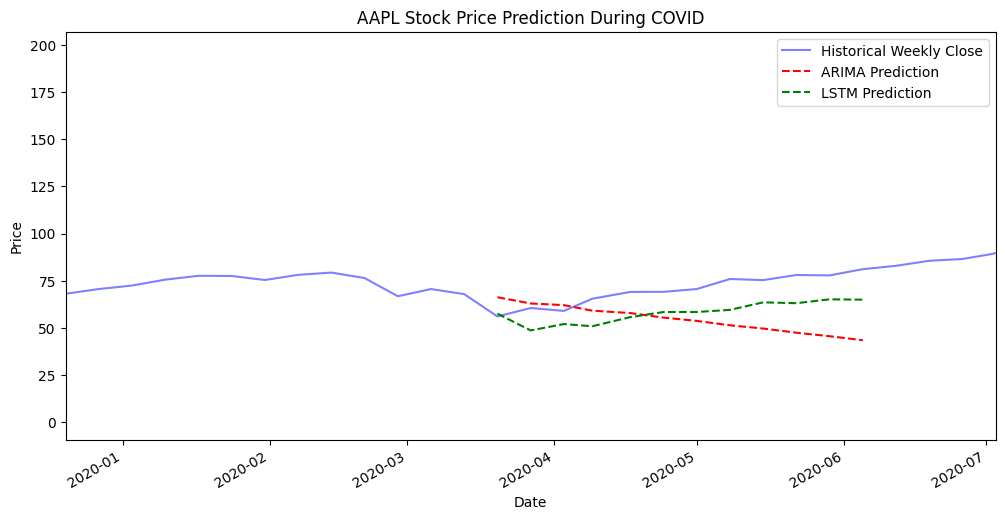

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming loading functions are already defined and executed

# Convert predictions to DataFrame for easy plotting
arima_pred_df = pd.DataFrame(list(arima_predictions.items()), columns=['Date', 'Prediction'])
arima_pred_df['Date'] = pd.to_datetime(arima_pred_df['Date'])
arima_pred_df.set_index('Date', inplace=True)

lstm_pred_df = pd.DataFrame(list(lstm_predictions.items()), columns=['Date', 'Prediction'])
lstm_pred_df['Date'] = pd.to_datetime(lstm_pred_df['Date'])
lstm_pred_df.set_index('Date', inplace=True)

# Determine the earliest and latest prediction dates across both models
earliest_pred_date = min(arima_pred_df.index.min(), lstm_pred_df.index.min())
latest_pred_date = max(arima_pred_df.index.max(), lstm_pred_df.index.max())

# Set the window around the prediction period (3 months before, 4 weeks after)
window_start = earliest_pred_date - pd.DateOffset(months=3)
window_end = latest_pred_date + pd.DateOffset(weeks=4)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Weekly Close', color='blue', alpha=0.5)
plt.plot(arima_pred_df.index, arima_pred_df['Prediction'].astype(float), label='ARIMA Prediction', color='red', linestyle='--')
plt.plot(lstm_pred_df.index, lstm_pred_df['Prediction'].astype(float), label='LSTM Prediction', color='green', linestyle='--')

plt.title(f'{ticker} Stock Price Prediction During COVID')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xlim(window_start, window_end)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()


## Calculate RMSE and MAE for all predicitons

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(actual, predictions):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)
    return rmse, mae

# Ensure that the index in 'df' and the predictions DataFrames match in format and range
# You may need to align or truncate one of the series to ensure they match

# Example for ARIMA (repeat for LSTM with lstm_pred_df)
actual_prices = df.loc[arima_pred_df.index]['Close']
rmse, mae = calculate_metrics(actual_prices, arima_pred_df['Prediction'])

print(f"ARIMA RMSE: {rmse}")
print(f"ARIMA MAE: {mae}")

# Repeat the calculation for LSTM predictions
actual_prices_lstm = df.loc[lstm_pred_df.index]['Close']
rmse_lstm, mae_lstm = calculate_metrics(actual_prices_lstm, lstm_pred_df['Prediction'])

print(f"LSTM RMSE: {rmse_lstm}")
print(f"LSTM MAE: {mae_lstm}")


ARIMA RMSE: 21.287143617526805
ARIMA MAE: 17.915934639017806
LSTM RMSE: 12.607263438757029
LSTM MAE: 11.953935470581053


Processing event: covid


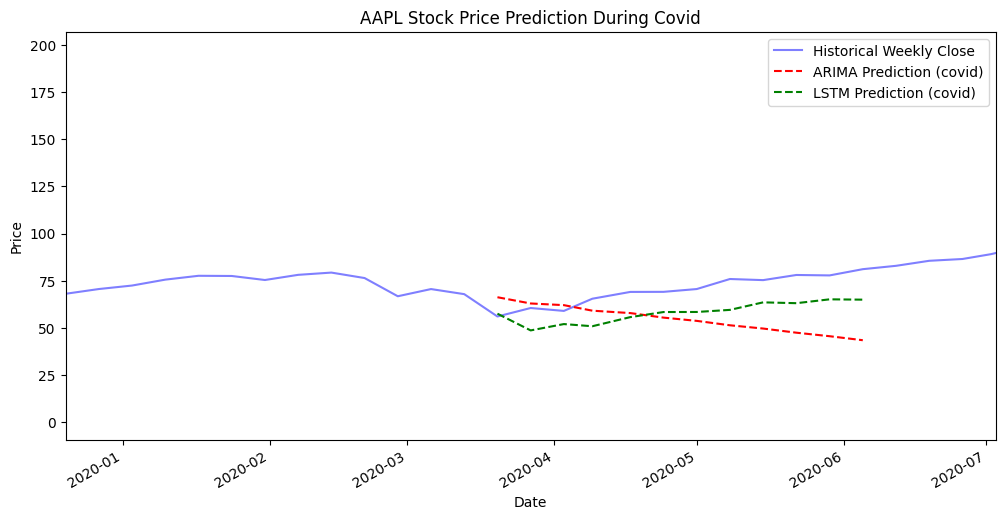

ARIMA - covid - RMSE: 21.287143617526805, MAE: 17.915934639017806
LSTM - covid - RMSE: 12.607263438757029, MAE: 11.953935470581053

Processing event: stable


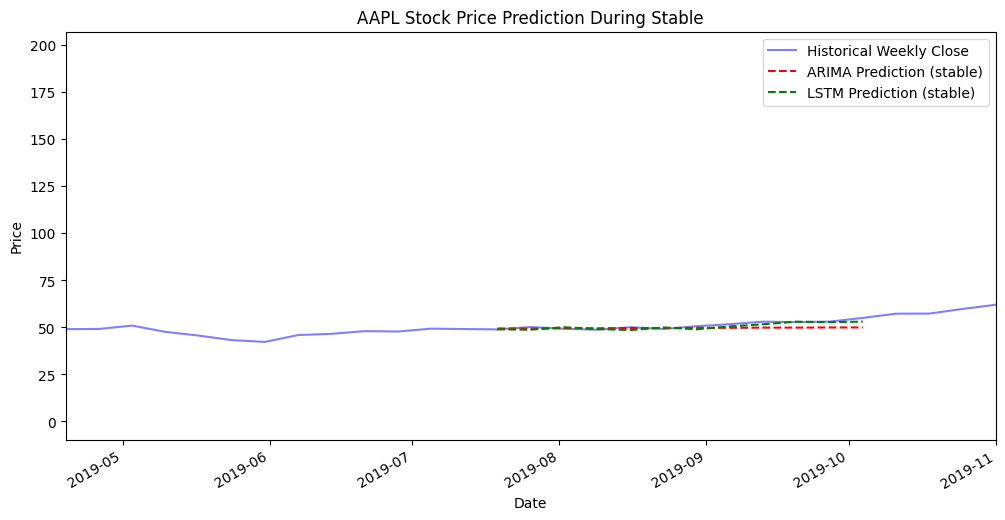

ARIMA - stable - RMSE: 2.2453114977732165, MAE: 1.6971027093165745
LSTM - stable - RMSE: 1.1446128243225815, MAE: 0.9704646575927723

Processing event: drop


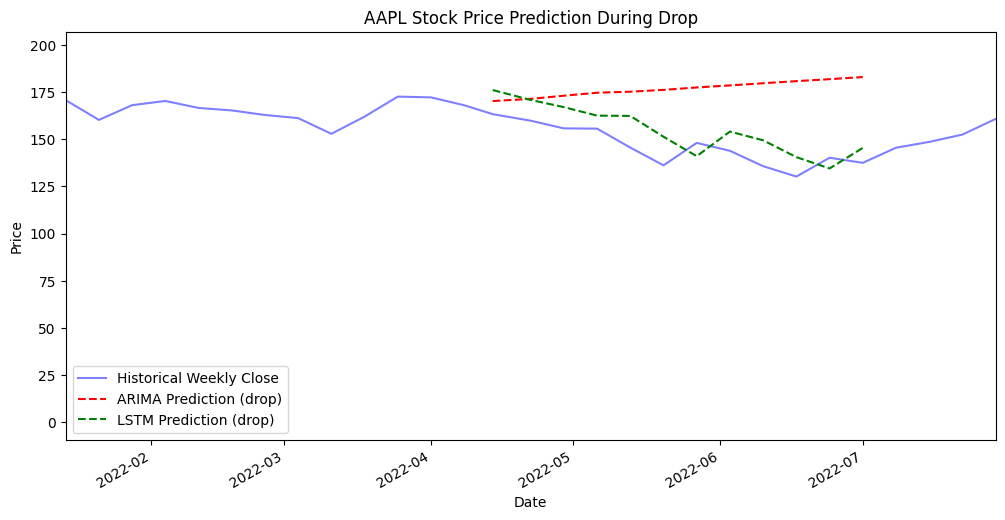

ARIMA - drop - RMSE: 33.851194435846814, MAE: 30.929819152912454
LSTM - drop - RMSE: 11.256965160820862, MAE: 10.755308068847656



In [11]:
events = ["covid", "stable", "drop"]  # Define all your event names here

for event in events:
    print(f"Processing event: {event}")
    
    # Load predictions for both models
    arima_predictions = load_predictions(ticker, "ARIMA", event)
    lstm_predictions = load_predictions(ticker, "LSTM", event)
    
    # Convert predictions to DataFrames
    arima_pred_df = pd.DataFrame(list(arima_predictions.items()), columns=['Date', 'Prediction']).set_index('Date')
    lstm_pred_df = pd.DataFrame(list(lstm_predictions.items()), columns=['Date', 'Prediction']).set_index('Date')
    arima_pred_df.index = pd.to_datetime(arima_pred_df.index)
    lstm_pred_df.index = pd.to_datetime(lstm_pred_df.index)
    
    # Determine the prediction period
    earliest_pred_date = min(arima_pred_df.index.min(), lstm_pred_df.index.min())
    latest_pred_date = max(arima_pred_df.index.max(), lstm_pred_df.index.max())
    window_start = earliest_pred_date - pd.DateOffset(months=3)
    window_end = latest_pred_date + pd.DateOffset(weeks=4)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Weekly Close', color='blue', alpha=0.5)
    plt.plot(arima_pred_df.index, arima_pred_df['Prediction'].astype(float), label=f'ARIMA Prediction ({event})', color='red', linestyle='--')
    plt.plot(lstm_pred_df.index, lstm_pred_df['Prediction'].astype(float), label=f'LSTM Prediction ({event})', color='green', linestyle='--')
    plt.title(f'{ticker} Stock Price Prediction During {event.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xlim(window_start, window_end)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate date labels
    plt.show()
    
    # Calculate RMSE and MAE for ARIMA and LSTM
    actual_prices = df.loc[arima_pred_df.index]['Close']
    rmse_arima, mae_arima = calculate_metrics(actual_prices, arima_pred_df['Prediction'])
    print(f"ARIMA - {event} - RMSE: {rmse_arima}, MAE: {mae_arima}")
    
    actual_prices_lstm = df.loc[lstm_pred_df.index]['Close']
    rmse_lstm, mae_lstm = calculate_metrics(actual_prices_lstm, lstm_pred_df['Prediction'])
    print(f"LSTM - {event} - RMSE: {rmse_lstm}, MAE: {mae_lstm}\n")
